## Import

In [1]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import pandas as pd
from root_numpy import array2tree
import scipy
import awkward
import numpy as np
import time
import math

sys.path.append('/afs/desy.de/user/l/lbenato/cms-lpc-llp_repo/run3_muon_system_analysis/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
from helper_functions import deltaR, deltaPhi
import CMS_lumi, tdrstyle

rt.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.24/06


## Load ntuples

In [2]:
fpath =OrderedDict()
tree = OrderedDict()

start_t = time.time()
data_year = 2022

vers = 'V1p19'
#v3 includes events with at least 2 clusters

data_path = '/nfs/dust/cms/group/cms-llp/muon_system_run3/'+vers+'/Data'+str(data_year)+'/v3/'


if data_year == 2022:
    fpath['data'] = data_path + 'DisplacedJet-EXOCSCCluster_Run2022EFG-PromptReco-v1_goodLumi.root'

NEvents = {}
for k,v in fpath.items():
    print (k, v)
    root_dir = uproot.open(v)
    print(root_dir.keys())
    tree[k] = root_dir['MuonSystem']
    ##print(tree[k].GetEntries())
    print(root_dir['NEvents'][1])
    NEvents[k] = root_dir['NEvents'][1]
    a = tree[k]["weight"].array()
    # 22743688.0
    
for k, T in tree.items():
    branch_names = T.keys()
    print(T['runNum'].array().shape)
    hlt = T['HLTDecision'].array()
    print(hlt.shape)
    #sel_jet = np.logical_and(T.array('jetPt') > 30, np.abs(T.array('jetEta')) < 2.4 )
    print(hlt[hlt>0].shape)

data /nfs/dust/cms/group/cms-llp/muon_system_run3/V1p19/Data2022/v3/DisplacedJet-EXOCSCCluster_Run2022EFG-PromptReco-v1_goodLumi.root
[b'MuonSystem;1', b'Nmet200;1', b'NmetFilter;1', b'Nlep0;1', b'Njet1;1', b'NcosmicVeto;1', b'NEvents;1']
15508012.0
(1716981,)
(1716981, 1201)
(3398133,)


## Load variables

In [3]:
JET_PT_CUT = 10.0
MUON_PT_CUT = 20.0
N_RECHIT_CUT = 90
jetPt_cut = 50
tightid = False
ring_cut = 50

cut_based = True
cut_based_version = 'v4'

intime = True
DPHI_CUT = 1


gLLP_csc = {}

nCscClusters = {}
nDtClusters = {}
selections_cluster = {}
sel_cluster = {}
sel_jetveto = {}
met_trigger = {}
met = {}
gLLP_beta = {}
jetPt = {}
jetPhi = {}
metPhi = {}
angle ={}
nLeptons = {}
genJetPt = {}
genJetPhi = {}
genMet = {}
genMetPhi = {}
pileupWeight = {}
gLLP_ctau = {}
npv = {}
nRechitClusters = {}
nJets = {}
nJets_50gev = {}
nCscRings = {}
nDtRings = {}

weight = {}
jetMet_dPhiMin = {}
dphiMet_cluster = {}
nRechits_sr = {}
jetMet_dPhiMin30_sr = {}
cscClusterTimeSpread = {}
bdt_score = {}
nCscChambers = {}
a = {}
b = {}
c = {}
d = {}
sel_ev = {}
cluster_index = ''
nRings = {}

cscRechitClusterMuonVetoPt1 = {}
cscRechitClusterJetVetoPt1 = {}
cscRechitClusterMuonVetoPt2 = {}
cscRechitClusterJetVetoPt2 = {}
cscRechitClusterTime1 = {}
cscRechitClusterTime2 = {}
cscRechitClusterPhi1 = {}
cscRechitClusterEta1 = {}
cscRechitClusterPhi2 = {}
cscRechitClusterEta2 = {}
cscClusterSize1 = {}
cscClusterSize2 = {}

cscClusterSize3 = {}

cscRechitClusterDphi1 = {}
cscRechitClusterDphi2 = {}
cscRechitClusterMuonVetoPt = {}
cscRechitClusterJetVetoPt = {}
dtRechitClusterMuonVetoPt = {}
dtRechitClusterJetVetoPt = {}
dtRechitClusterTime = {}
dtRechitClusterPhi = {}
dtRechitClusterEta = {}
dtClusterSize = {}
cscRechitClusterPhi = {}
cscRechitClusterEta = {}
cscClusterSize = {}
cscRechitClusterTime = {}
deltaEta = {}        
deltaRCluster = {}
dtRechitClusterDphi = {}
metPhi = {}
nCscClusters = {}
evtNum = {}
runNum = {}
lumiNum = {}
nDtSectors = {}
nDtStations= {}
nDtWheels= {}
nDTRechitsNoiseSec8= {}
nDTRechitsNoiseSec9= {}
nDTRechitsNoiseSec10= {}
cscRechitClusterNStation = {}
dtRechitClusterNStation ={}
dtRechitClusterMaxStation = {}
cscRechitClusterMe11Ratio = {}
nMe11 = {}
category = 0
tree_keys = []
#2csc, 1csc+1dt

In [4]:
#print(branch_names)
for a in branch_names:
    if "Time" in str(a):
        print(a)
    if "Total" in str(a):
        print(a)
    if "dPhi" in str(a):
        print(a)
    if "met" in str(a):
        print(a)
    if "ing" in str(a):
        print(a)
    if "EE" in str(a):
        print(a)
    #if "dtRechitCluster" in str(a):
    #    print(a)
    if "Station" in str(a):
        print(a)

b'met'
b'metPhi'
b'nCscRings'
b'nDtRings'
b'cscRechitClusterTimeWeighted'
b'cscRechitClusterTimeSpreadWeightedAll'
b'cscRechitClusterNStation10'
b'cscRechitClusterAvgStation10'
b'cscRechitClusterMaxStation'
b'cscRechitClusterMaxStationRatio'
b'cscRechitClusterMet_dPhi'
b'dtRechitClusterNSegStation1'
b'dtRechitClusterNSegStation2'
b'dtRechitClusterNSegStation3'
b'dtRechitClusterNSegStation4'
b'dtRechitClusterNOppositeSegStation1'
b'dtRechitClusterNOppositeSegStation2'
b'dtRechitClusterNOppositeSegStation3'
b'dtRechitClusterNOppositeSegStation4'
b'dtRechitClusterNoiseHitStation1'
b'dtRechitClusterNoiseHitStation2'
b'dtRechitClusterNoiseHitStation3'
b'dtRechitClusterNoiseHitStation4'
b'dtRechitClusterNStation10'
b'dtRechitClusterAvgStation10'
b'dtRechitClusterMaxStation'
b'dtRechitClusterMaxStationRatio'
b'dtRechitClusterNHitStation1'
b'dtRechitClusterNHitStation2'
b'dtRechitClusterNHitStation3'
b'dtRechitClusterNHitStation4'
b'dtRechitClusterMet_dPhi'
b'dtRechitCluster_match_RPChits_dPhi

In [5]:
for k, T in tree.items():
    tree_keys.append(k)
    #if not k == 'data' and not k[-4:] == '1000':continue
########### SELECTION: CLUSTERS ############
    sel_csccluster = T.array('cscRechitCluster' + cluster_index + 'TimeSpreadWeightedAll')<20
    #Missing branch:
    #sel_csccluster = np.logical_and(sel_csccluster, np.abs(T.array('cscRechitCluster' + cluster_index + 'MetEENoise_dPhi'))<1.2)
    sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')<30)
    #Missing branch:
    #sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'Me11Ratio')<1)
    sel_csccluster = np.logical_and(sel_csccluster, np.logical_not(np.logical_and(T.array('cscRechitClusterMuonVetoPt') >= 30, T.array('cscRechitClusterMuonVetoGlobal'))))
    sel_csccluster = np.logical_and(sel_csccluster, np.logical_and(
        T.array('cscRechitCluster' + cluster_index + 'TimeWeighted')< 12.5, 
        T.array('cscRechitCluster' + cluster_index + 'TimeWeighted') > -5))

    
    #Missing branch:
    #sel_dtcluster = np.abs(T.array('dtRechitClusterMetEENoise_dPhi')) < 1
    sel_dtcluster = np.logical_not(np.logical_and(T.array('dtRechitClusterMuonVetoPt') >= 10, T.array('dtRechitClusterMuonVetoLooseId')))
    sel_dtcluster = np.logical_and(sel_dtcluster, np.abs(T.array('dtRechitClusterJetVetoPt')) < 50)
    sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_not(np.logical_and(T.array('dtRechitClusterMaxStation')==1, T.array('dtRechitClusterMaxStationRatio')>0.9)))
    
    cut = 5
    station = (T.array('dtRechitClusterNSegStation1')>cut).astype(int)+(T.array('dtRechitClusterNSegStation2')>cut).astype(int)\
+(T.array('dtRechitClusterNSegStation3')>cut).astype(int)+(T.array('dtRechitClusterNSegStation4')>cut).astype(int)

    max_station = np.maximum(np.maximum(np.maximum(T.array('dtRechitClusterNSegStation1'), T.array('dtRechitClusterNSegStation2')), T.array('dtRechitClusterNSegStation3')), T.array('dtRechitClusterNSegStation4'))
    min_station = np.minimum(np.minimum(np.minimum(T.array('dtRechitClusterNSegStation1'), T.array('dtRechitClusterNSegStation2')), T.array('dtRechitClusterNSegStation3')), T.array('dtRechitClusterNSegStation4'))
    sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_or(station<4, min_station/max_station<0.4)) 
    #print(max_station)
    #print(sel_dtcluster)
    
    
########### SELECTION: JETS ############
    
    sel_jet = np.logical_and(T.array('jetPt') > jetPt_cut, np.abs(T.array('jetEta')) < 2.4 )

########### SELECTION: EVENTS ############
    hlt = T['HLTDecision'].array()    
    #HLT_CaloMET60_DTCluster50 = hlt[:,562]
    #HLT_CaloMET60_DTClusterNoMB1S50 = hlt[:,563]
    #HLT_L1MET_DTCluster50 = hlt[:,564]
    #HLT_L1MET_DTClusterNoMB1S50 = hlt[:,565]
    HLT_CscCluster_Loose = hlt[:,566]
    HLT_CscCluster_Medium = hlt[:,567]
    HLT_CscCluster_Tight = hlt[:,568]
    HLT_L1CSCShower_DTCluster50 = hlt[:,569]
    HLT_L1CSCShower_DTCluster75 = hlt[:,570]

    #Or of the triggers: starting with the CSC ones
    sel_ev[k] = np.logical_or(HLT_CscCluster_Loose,np.logical_or(HLT_CscCluster_Medium,HLT_CscCluster_Tight))

    #sel_ev[k]  = np.logical_and(sel_ev[k], T.array('category') == 0)
    #sel_ev[k] = np.logical_and(sel_ev[k], (T.array('nDtRings')+T.array('nCscRings'))<10)
    #sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('metEENoise') > 200)
    sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('nLeptons') == 0)
    ##print("Events passing so far: ", sel_ev[k].sum())
    #sel_ev[k] = np.logical_and(sel_ev[k] , sel_jet.sum()>=1)
    #sel_ev[k] = np.logical_and(sel_ev[k],T.array('Flag2_all'))
    ##print("Events passing so far: ", sel_ev[k].sum())
    



    if category == 0:
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum() >= 2)
        #Adding this to avoid overlaps as a starting point
#         sel_ev[k]  = np.logical_and(sel_ev[k],sel_dtcluster.sum() == 0)
    elif category == 1:      
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum() == 1)
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_dtcluster.sum() == 1)
        
    #break
########### BRANCHES ############
    ##### event variables #####
    #gLLP_beta[k] = T.array('gLLP_beta')[sel_ev[k]]

    if category == 0:


        cscRechitClusterMuonVetoPt1[k] = T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')[sel_csccluster][sel_ev[k]][:,:]
        cscRechitClusterJetVetoPt1[k] = T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')[sel_csccluster][sel_ev[k]][:,:]
        cscRechitClusterPhi1[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_csccluster][sel_ev[k]][:,:]
        cscRechitClusterEta1[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_csccluster][sel_ev[k]][:,:]
        cscClusterSize1[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_csccluster][sel_ev[k]][:,:]
        cscRechitClusterTime1[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeWeighted')[sel_csccluster][sel_ev[k]][:,:]
        #cscRechitClusterDphi1[k] =  T.array('cscRechitCluster' + cluster_index + 'MetEENoise_dPhi')[sel_csccluster][sel_ev[k]][:,:]
        cscRechitClusterMuonVetoPt2[k] = T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')[sel_csccluster][sel_ev[k]][:,:]
        #cscRechitClusterMe11Ratio[k] =  T.array('cscRechitCluster' + cluster_index + 'Me11Ratio')[sel_csccluster][sel_ev[k]]  

        cscClusterSize3[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_csccluster][ np.logical_and(sel_ev[k],sel_csccluster.sum() > 2)  ][:,:]
        
        nCscClusters[k] = sel_csccluster.sum()[sel_ev[k]]
        nDtClusters[k] = sel_dtcluster.sum()[sel_ev[k]]
    elif category == 1:
        dtRechitClusterMuonVetoPt[k] = T.array('dtRechitClusterMuonVetoPt')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterJetVetoPt[k] = T.array('dtRechitClusterJetVetoPt')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterPhi[k] = T.array('dtRechitClusterPhi')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterEta[k] = T.array('dtRechitClusterEta')[sel_dtcluster][sel_ev[k]][:,0]
        dtClusterSize[k] =  T.array('dtRechitClusterSize')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterTime[k] =  T.array('dtRechitCluster_match_RPCBx_dPhi0p5')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterNStation[k] =  T.array('dtRechitClusterNStation10')[sel_dtcluster][sel_ev[k]][:,0]
        cscRechitClusterMuonVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterJetVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_csccluster][sel_ev[k]][:,0]
        cscClusterSize[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterTime[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeWeighted')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterNStation[k] =  T.array('cscRechitCluster' + cluster_index + 'NStation10')[sel_csccluster][sel_ev[k]][:,0]
        nCscClusters[k] = sel_csccluster.sum()[sel_ev[k]]
        nDtClusters[k] = sel_dtcluster.sum()[sel_ev[k]]
        
        #This gives some errors...
        #nMe11[k] = T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus11')[sel_csccluster][sel_ev[k]][:,0]+T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus11')[sel_csccluster][sel_ev[k]][:,0]
        print(dtRechitClusterEta[k].shape)
        print(cscRechitClusterEta[k].shape)
        
        #To be fixed, some issues with deltaPhi function
        #deltaRCluster[k] = deltaR(dtRechitClusterEta[k], dtRechitClusterPhi[k],cscRechitClusterEta[k], cscRechitClusterPhi[k])
        #deltaEta[k] = dtRechitClusterEta[k]-cscRechitClusterEta[k]

        dtRechitClusterMaxStation[k] = T.array('dtRechitClusterMaxStation')[sel_dtcluster][sel_ev[k]][:,0]

    #weight[k] = (T.array('weight')*T.array('pileupWeight')*T.array('higgsPtWeight')*T.array('metSF'))[sel_ev[k]]
    #nDtSectors[k] = np.sum(np.reshape(T.array('nDTRechitsSector')>=3, (-1,4*5*12)), axis = 1)[sel_ev[k]]
    #nDtStations[k] = T.array('nDtStations25')[sel_ev[k]]
    #nDtWheels[k] = T.array('nDtWheels25')[sel_ev[k]]



/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: invalid value encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Prepare histograms

nCscClusters

/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


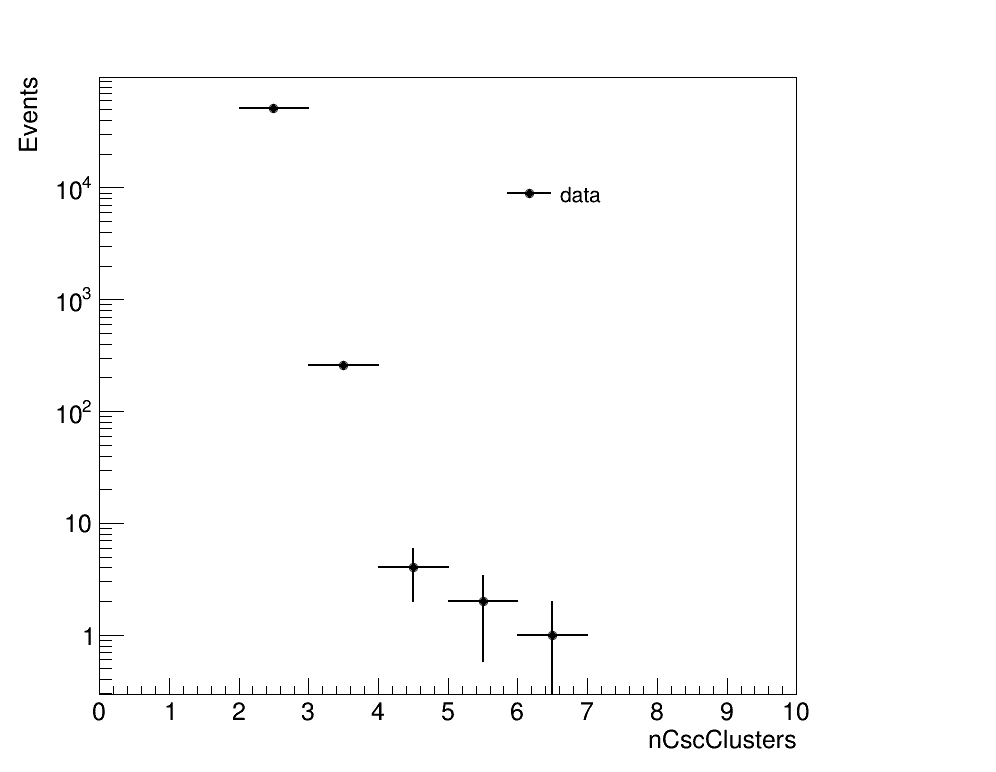

In [6]:
can = rt.TCanvas('c','c', 1000, 800)
leg = rt.TLegend(0.5,0.7,0.75,0.8)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
h = {}
can.cd()
for k in tree_keys:
    h[k] = create_TH1D(nCscClusters[k].flatten(),title="",axis_title = ['nCscClusters','Events'], binning=[10,0,10])
    h[k].Sumw2()
    leg.AddEntry(h[k],k)
    h[k].SetLineColor(1)
    h[k].SetLineWidth(2)
    h[k].SetMarkerColor(1)
    h[k].SetMarkerStyle(20)
    h[k].SetMarkerSize(1.2)
    #if h[k].Integral()>0:h[k].Scale(1./h[k].Integral())
    #h[k].SetMaximum(1.5)
    #h[k].SetMinimum(0.002)
    h[k].Draw('PE same')

leg.Draw()
can.SetRightMargin(0.2)

# if setlog: 
can.SetLogy()
can.Draw()

cluster size

[[112 55] [367 131] [1149 57] ... [215 62] [208 65] [212 71]]


/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

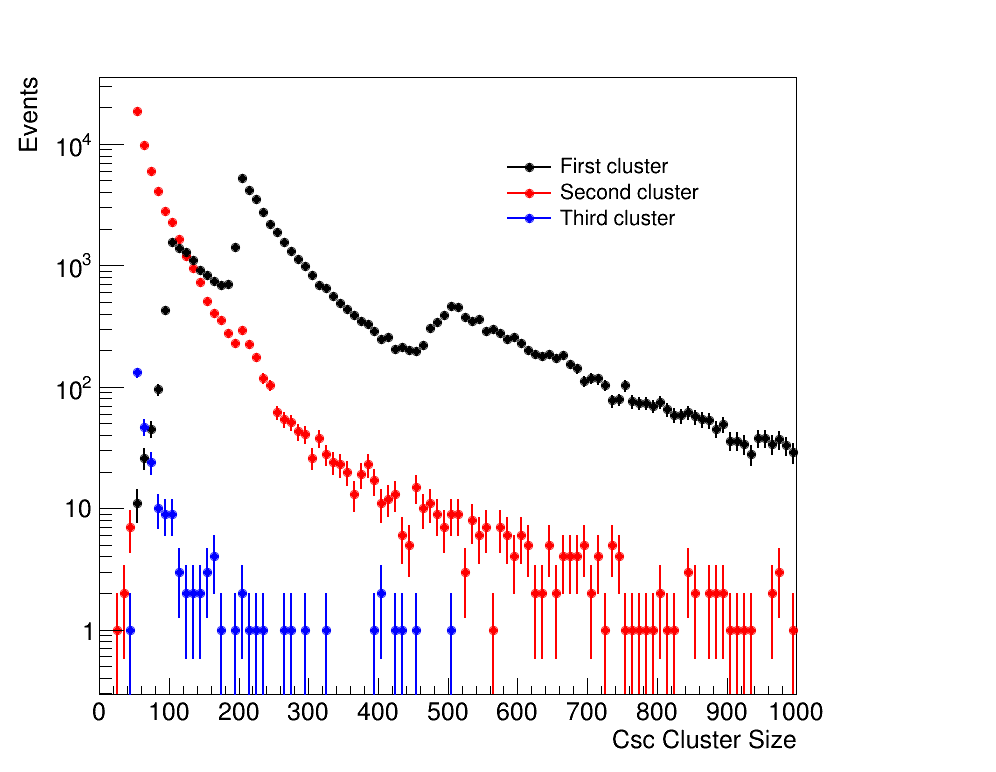

In [7]:
can = rt.TCanvas('c','c', 1000, 800)
leg = rt.TLegend(0.5,0.7,0.75,0.8)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
h0 = {}
h1 = {}
h2 = {}
can.cd()
for k in tree_keys:
    print(cscClusterSize1[k])
    h0[k] = create_TH1D(cscClusterSize1[k][:,0].flatten(),title="",axis_title = ['Csc Cluster Size','Events'], binning=[100,0,1000])
    leg.AddEntry(h0[k],"First cluster")
    h0[k].SetLineColor(1)
    h0[k].SetLineWidth(2)
    h0[k].SetMarkerColor(1)
    h0[k].SetMarkerStyle(20)
    h0[k].SetMarkerSize(1.2)
    #if h[k].Integral()>0:h[k].Scale(1./h[k].Integral())
    #h[k].SetMaximum(1.5)
    #h[k].SetMinimum(0.002)

    
    h1[k] = create_TH1D(cscClusterSize1[k][:,1].flatten(),title="",axis_title = ['Csc Cluster Size','Events'], binning=[100,0,1000])
    leg.AddEntry(h1[k],"Second cluster")
    h1[k].SetLineColor(2)
    h1[k].SetLineWidth(2)
    h1[k].SetMarkerColor(2)
    h1[k].SetMarkerStyle(20)
    h1[k].SetMarkerSize(1.2)
    #if h[k].Integral()>0:h[k].Scale(1./h[k].Integral())
    #h[k].SetMaximum(1.5)
    #h[k].SetMinimum(0.002)

    
    #selection when more than 2...
    h2[k] = create_TH1D(cscClusterSize3[k][:,2].flatten(),title="",axis_title = ['Csc Cluster Size','Events'], binning=[100,0,1000])
    leg.AddEntry(h2[k],"Third cluster")
    h2[k].SetLineColor(4)
    h2[k].SetLineWidth(2)
    h2[k].SetMarkerColor(4)
    h2[k].SetMarkerStyle(20)
    h2[k].SetMarkerSize(1.2)    
    
    h1[k].Draw('PE same')
    h0[k].Draw('PE same')    
    h2[k].Draw('PE same')    
    
leg.Draw()
can.SetRightMargin(0.2)

# if setlog: 
can.SetLogy()
can.Draw()